In [1]:
#Importing the important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.tree as tree
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%pylab inline
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Read and Display the Data 
df = pd.read_csv(r"C:\Users\talkt\Downloads\Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [19]:
df.shape

(3546654, 12)

In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,3.546654e+06,3.546653e+06,3.546653e+06,3.546653e+06,3.546653e+06,3.546653e+06,3.546653e+06,3.546653e+06
mean,1.432367e+02,1.569191e+05,8.392561e+05,8.607654e+05,9.947762e+05,1.098759e+06,8.230295e-04,5.639119e-07
std,8.318451e+01,2.658956e+05,2.906348e+06,2.942675e+06,2.302074e+06,2.380167e+06,2.867669e-02,7.509406e-04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.200000e+01,1.264579e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.620000e+02,7.614377e+04,1.448600e+04,0.000000e+00,1.381884e+05,2.238809e+05,0.000000e+00,0.000000e+00
75%,2.100000e+02,2.104640e+05,1.115230e+05,1.510846e+05,9.428234e+05,1.122168e+06,0.000000e+00,0.000000e+00
max,2.600000e+02,1.000000e+07,3.893942e+07,3.894623e+07,4.265577e+07,4.285430e+07,1.000000e+00,1.000000e+00


In [7]:
df = df.drop(columns=['step', 'nameOrig', 'nameDest'])

**Convert the 'type' values using OneHotEncoder.**

In [8]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [9]:
# transforming the column after fitting
ohe = ohe.fit_transform(df[['type']]).toarray()

In [10]:
# converting arrays into DataFrame
enc_col = pd.DataFrame(ohe)

In [11]:
# concating dataframes 
df = pd.concat([df, enc_col], axis = 1) 

In [12]:
# removing the encoded column.
df = df.drop(['type'], axis = 1) 
df.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,0,1,2,3,4
0,9839.64,170136.0,160296.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1864.28,21249.0,19384.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,181.00,181.0,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,181.00,181.0,0.00,21182.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,11668.14,41554.0,29885.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3546654 entries, 0 to 3546653
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   amount          float64
 1   oldbalanceOrg   float64
 2   newbalanceOrig  float64
 3   oldbalanceDest  float64
 4   newbalanceDest  float64
 5   isFraud         float64
 6   isFlaggedFraud  float64
 7   0               float64
 8   1               float64
 9   2               float64
 10  3               float64
 11  4               float64
dtypes: float64(12)
memory usage: 324.7 MB


**Checking the Null Values in the Dataset**

In [14]:
df.isnull().sum()

amount            1
oldbalanceOrg     1
newbalanceOrig    1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
0                 0
1                 0
2                 0
3                 0
4                 0
dtype: int64

In [16]:
df.dropna()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,0,1,2,3,4
0,9839.64,170136.00,160296.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1864.28,21249.00,19384.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,181.00,181.00,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,181.00,181.00,0.00,21182.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,11668.14,41554.00,29885.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3546648,3917.30,21012.00,17094.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3546649,7829.76,22116.00,14286.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3546650,10792.26,14286.24,3493.98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3546651,6796.17,824941.00,818144.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


###### There are no missing values

<Axes: >

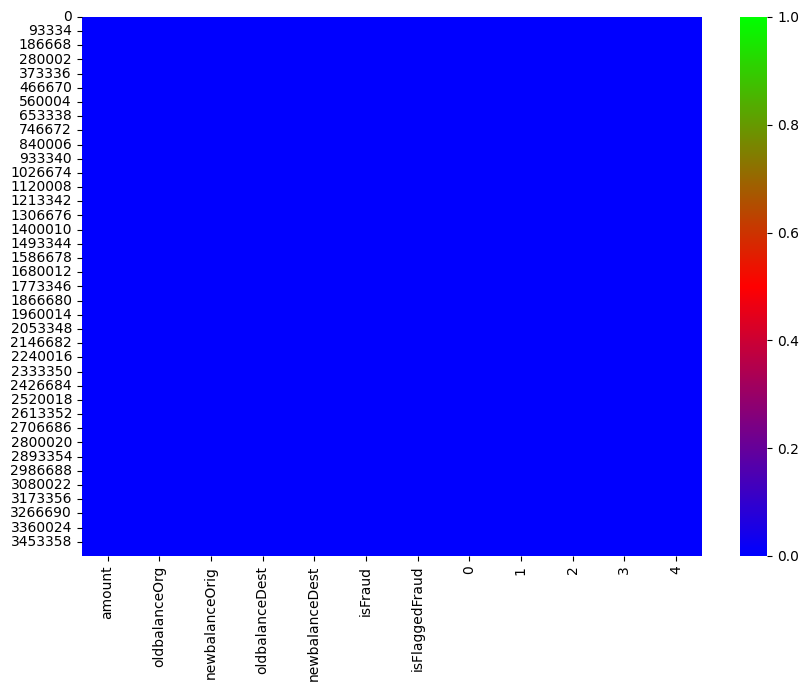

In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),cmap='brg')

visualizing the outliers by using boxplot

In [ ]:
#visualize the outliers using boxplot
plt.figure(figsize =(20,35))
graph = 1

for column in df:
    if graph<=10:
        plt.subplot(5,2,graph)
        ax = sns.boxplot(data=df[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [ ]:
# find the IQR to identify outliers

#1st Quantile

Q1 = df.quantile(0.10)

# 3rd Quantile

Q3 = df.quantile(0.90)

#IQR ( Inter Quantile Range)

IQR = Q3-Q1

In [ ]:
#validating one outlier
preg_high = (Q3.amount + (1.5*IQR.amount))
preg_high

In [ ]:
# Check the indexes whcih have higher values
index = np.where(df['amount']>preg_high)
index

In [ ]:
df= df.drop(df.index[index])
df.shape

In [ ]:
df.reset_index()

In [ ]:
#validating one outlier
preg_high = (Q3.oldbalanceOrg + (1.5*IQR.oldbalanceOrg))
preg_high

In [ ]:
# Check the indexes whcih have higher values
index = np.where(df['oldbalanceOrg']>preg_high)
index

In [ ]:
df= df.drop(df.index[index])
df.shape

In [ ]:
df.reset_index()

In [ ]:
#validating one outlier
preg_high = (Q3.newbalanceOrig + (1.5*IQR.newbalanceOrig))
preg_high

In [ ]:
# Check the indexes whcih have higher values
index = np.where(df['newbalanceOrig']>preg_high)
index

In [ ]:
df= df.drop(df.index[index])
df.shape

In [ ]:
df.reset_index()

In [ ]:
#validating one outlier
preg_high = (Q3.oldbalanceDest + (1.5*IQR.oldbalanceDest))
preg_high

In [ ]:
# Check the indexes whcih have higher values
index = np.where(df['oldbalanceDest']>preg_high)
index

In [ ]:
df= df.drop(df.index[index])
df.shape

In [ ]:
df.reset_index()

In [ ]:
#validating one outlier
preg_high = (Q3.newbalanceDest + (1.5*IQR.newbalanceDest))
preg_high

In [ ]:
# Check the indexes whcih have higher values
index = np.where(df['newbalanceDest']>preg_high)
index

In [ ]:
df= df.drop(df.index[index])
df.shape

In [ ]:
df.reset_index()

In [ ]:
df.info()

In [ ]:
#validating one outlier
preg_high = (Q3.isFraud  + (1.5*IQR.isFraud ))
preg_high

In [ ]:
#Let's see how data is distributed for every column
plt.figure(figsize = (20,35) , facecolor='red')
plotnumber=1

for columns in df:
    if plotnumber <=10:
        ax = plt.subplot(5,2,plotnumber)
        sns.distplot(df[columns])
        plt.xlabel(columns,fontsize=20)
    plotnumber+=1
    
plt.tight_layout()

After Removing the outliers the new data set is 

In [ ]:
#visualize the outliers using boxplot
plt.figure(figsize =(20,35))
graph = 1

for column in df:
    if graph<=10:
        plt.subplot(5,2,graph)
        ax = sns.boxplot(data=df[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [ ]:
df.shape

In [ ]:
df["finalbalanceOrig"] = df['newbalanceOrig'] - df['oldbalanceOrg']
df["finalbalanceDest"] = df['newbalanceDest'] - df['oldbalanceDest']

In [ ]:
df = df.drop(columns=['oldbalanceOrg','newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'])

**Displaying the heatmap data.**

In [ ]:
def corr_heatmap(df):
    corltn = df.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(corltn, vmax=1.0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
corr_heatmap(df)

**Conclusion from correlation heatmap**

1. From the above heatmap, it is clear that the feature 
'oldbalanceOrg' has high correlation with 'newbalanceorg' and feature 'oldbalanceDest' has high correlation with 'newbalanceDest'.

2. Therefore, we can drop either one of them in both cases.

3. But here, I am finding new information which is the difference between the new balance and the old balance for both 'Org' and 'Dest' and storing them under the new column names 'finalbalanceOrig' and 'finalbalanceDest' respectively.

4. Finally, I am droping the original columns 'oldbalanceOrg','newbalanceorg','oldbalanceDest' and 'newbalanceDest'.





Display the Dataset

In [ ]:
df.head()

MODEL DEVELOPMENT

Separating the feature and the Label columns

In [ ]:
#Finding relationship we want to keep only those feature which have relationship with labels
X = df.drop(columns = ["isFraud"])
y = df["isFraud"]

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
X.columns = X.columns.astype(str)

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
#X.columns = X.columns.astype(str)
X_scalar = scalar.fit_transform(X)

Splitting the total dataset into training(70%) and testing dataset(30%)

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix, roc_curve,roc_auc_score
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.metrics import classification_report

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_scalar,y, test_size = 0.3, random_state = 355)

In [ ]:
def metric_score (clf, x_train,x_test,y_train,y_test, train = True):
    if train:
        y_pred = clf.predict(x_train)
        print("\n =================Train Result=====================")
        print(f"Accuracy Score : {accuracy_score(y_train,y_pred)*100:.2f}%")
    elif train == False:
        pred = clf.predict(x_test)
        print("\n==================Test Result=======================")
        print(f"Accuracy Score : {accuracy_score(y_test,pred)*100:.2f}%")
        
        print("\n \n Test Classification Report\n",classification_report(y_test,pred,digits=2))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Model Confidence / Accuracy
#Initiate KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
# Model Training
knn.fit(x_train,y_train)

In [ ]:
# call the function and pass dataset to check train and test score
metric_score(knn,x_train,x_test,y_train,y_test, train = True)
metric_score(knn,x_train,x_test,y_train,y_test, train = False)


In [ ]:
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
k_f = KFold(n_splits = 3)

In [ ]:
k_f

In [ ]:
#Cross Validation Score to check if the model is overfitting 
cross_val_score(knn, X_scalar,y,cv = 5)
cross_val_score(knn,X_scalar,y,cv = 5).mean()

using GridSearchCV for the bet parameter to improve the accuracy

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'algorithm' : ['kd_tree','brute'],
             'leaf_size' : [3,5,6,7,8],
             'n_neighbors' : [3,5,7,9,11,13]
             }

In [ ]:
gridsearch = GridSearchCV(estimator = knn,param_grid = param_grid)

In [ ]:
gridsearch.fit(x_train,y_train)

In [ ]:
GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [ ]:
gridsearch.best_params_

In [ ]:
# We will use the parameters in our K-NN algorithm and check if accuracy is increasing.
knn = KNeighborsClassifier(algorithm = 'kd_tree',leaf_size =3,n_neighbors = 7)

In [ ]:
knn.fit(x_train,y_train)

In [ ]:
# call the function and pass dataset to check train and test score
# This is for Training Score
metric_score(knn,x_train,x_test,y_train,y_test, train = True)
#This is for Testing Score
metric_score(knn,x_train,x_test,y_train,y_test, train = False)

In [ ]:
# If we want to check the confustion_matrix we can check
y_pred = knn.predict(x_test)
cfm = confusion_matrix (y_test,y_pred)
cfm

In [ ]:
X_scalar.shape[0]

In [ ]:
#Finding Variance inflation factor in each scaled columns
vif = pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scalar,i) for i in range (X_scalar.shape[1])]
vif["features"]=X.columns
vif

**Creation of Train and Test Dataset Using Optimum Parameters**

In [ ]:
#Now Split our data in test(30%) and training(70%) set
x_train,x_test,y_train,y_test=train_test_split(X_scalar,y, test_size = 0.3, random_state = 355)

In [ ]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

In [ ]:
#Let's see how well our model perform on the test data set
x_test

In [ ]:
y_pred = log_reg.predict(x_test)

In [ ]:
y_pred

In [ ]:
#Model Accuracy
accuracy = accuracy_score(y_test,y_pred)
accuracy

In [ ]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

In [ ]:
# ROC curve
fpr,tpr, thresholds = roc_curve(y_test,y_pred)
# Threshold [0] means no innstances predicted, it should be read from 0 to max
print('Threshold = ',thresholds)
print('True Positive Rate = ', tpr)
print("False Positive Rate = ", fpr)

In [ ]:
plt.plot(fpr,tpr, color = 'orange', label = 'ROC')
plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receive Operating Characteristic Curve')
plt.legend()
plt.show()

In [ ]:
# How much area it is covering (AUC) 
auc_score=roc_auc_score(y_test,y_pred)
print(auc_score)

**Let's Plot and Visualize**

In [ ]:
y_pred = log_reg.predict(x_test)
y_pred

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Attrition of Data')
plt.ylabel('Predicted Attrition of Data')
plt.title("Actual VS Model Predicted")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = log_reg.predict(x_test)

In [ ]:
# MAE (Mean Absolute Error)
mean_absolute_error(y_test,y_pred)

In [ ]:
# MSE (Mean Squared Error)
mean_squared_error(y_test,y_pred)

In [ ]:
# RMSE (Root Mean Squared Error)
np.sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [ ]:
#LassoCV will return best alpha after max iteration 
#Normalize is subtracting the mean and dividing by the L2_norm

lassocv = LassoCV(alphas = None, max_iter =100,normalize= True)
lassocv.fit(x_train,y_train)

In [ ]:
# Best Alpha Parameter
alpha = lassocv.alpha_
alpha

In [ ]:
# Now that we have best parameter, Let's use Lasso regression and see how well our data has fitted before
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

In [ ]:
lasso_reg.score(x_test,y_test)

In [ ]:
# Ridge will return best alpha and coefficient after performing 10 cross validation

ridgecv= RidgeCV(alphas= np.arange(0.001,0.1,0.01), normalize = True)
ridgecv.fit(x_train,y_train)

In [ ]:
ridgecv.alpha_

In [ ]:
ridge_model = Ridge(alpha = ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

In [ ]:
ridge_model.score(x_test,y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV as rsv

In [ ]:
#Now Split our data in test(30%) and training(70%) set
x_train,x_test,y_train,y_test=train_test_split(X,y, test_size = 0.30, random_state = 41)

In [ ]:
random_clf=RandomForestClassifier()

In [ ]:
random_clf.fit(x_train,y_train)

In [ ]:
# call the function and pass dataset to check train and test score
# This is for Training Score
metric_score(random_clf,x_train,x_test,y_train,y_test, train = True)
#This is for Testing Score
metric_score(random_clf,x_train,x_test,y_train,y_test, train = False)

In [ ]:
params={"n_estimators":[200,400],'max_depth':[6,9],'criterion':('gini','entropy')}
grd = GridSearchCV(random_clf,param_grid=params)
grd.fit(x_train,y_train)
print("best_params => ",grd.best_params_)

In [ ]:
random_clf=grd.best_estimator_
random_clf.fit(x_train,y_train)

In [ ]:
# call the function and pass dataset to check train and test score
# This is for Training Score
metric_score(random_clf,x_train,x_test,y_train,y_test, train = True)
#This is for Testing Score
metric_score(random_clf,x_train,x_test,y_train,y_test, train = False)

In [ ]:
#Plot ROC/AUC for multiple models without hyperparams tuning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

In [ ]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
kn = KNeighborsClassifier()

In [ ]:
# training with all classifiers
lr.fit(x_train,y_train)
rf.fit(x_train,y_train)
kn.fit(x_train,y_train)
dt.fit(x_train,y_train)
print("All Models Are Trained")

In [ ]:
#All Models Score Are Captured
lr.score(x_test,y_test)
kn.score(x_test,y_test)
dt.score(x_test,y_test)
rf.score(x_test,y_test)
print("All models test score are captured")

In [ ]:
disp = plot_roc_curve(dt,x_train,y_train)
plot_roc_curve(lr,x_train,y_train,ax=disp.ax_)
plot_roc_curve(kn,x_train,y_train,ax=disp.ax_)
plot_roc_curve(rf,x_train,y_train,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

In [ ]:
# How well our models works onn test data 
disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

In [ ]:
rfc=RandomForestClassifier()
rfc_para={"n_estimators":[200,400],'max_depth':[6,9],'criterion':('gini','entropy')}
rfc_rsv=rsv(rfc,rfc_para,cv=30)
rfc_rsv.fit(x_train,y_train)
print(rfc_rsv)
print('\nbest score=',rfc_rsv.best_score_)
print('\nbest parameters for RFC=\n',rfc_rsv.best_params_)

In [ ]:
rfc=rfc_rsv.best_estimator_
rfc.fit(x_train,y_train)

In [ ]:
# This is for Training Score
metric_score(random_clf,x_train,x_test,y_train,y_test, train = True)
#This is for Testing Score
metric_score(random_clf,x_train,x_test,y_train,y_test, train = False)

**Feeding the training dataset to ML model**

Here, I am using XGBoost ensemble learning techique for training of the model.

In [ ]:
# fit model no training data
!pip install xgboost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
model = XGBClassifier(objective='binary:logistic')
model.fit(x_train, y_train)

**Calculating the training and testing accuracies.**

TRAINING ACCURACY

In [ ]:
from sklearn.metrics import accuracy_score

# cheking training accuracy
y_pred = model.predict(x_train)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_train,predictions)
accuracy

TESTING ACCURACY

In [ ]:
# cheking initial test accuracy
y_pred = model.predict(x_test))
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test,predictions)
accuracy

**SAVING THE MODEL**

In [ ]:
import pickle

In [ ]:
filename = 'xgboost_model.pickle'
pickle.dump(model, open(filename, 'WB'))

loaded_model = pickle.load(open(filename, 'RB'))

****Important Aspects of the model****

**Task 1: Data cleaning including missing values, outliers and multi-collinearity:**

1. In the given dataset, there were no missing values.

2. I display outliers using the boxplots and Z-score value. The outliers could have been removed using Quantile based flooring and capping or Mean/Median imputation.

3. Heatmaps are used to display the corelations among features. Features with considerable correlation values are handeled by computing a different information from them as shown.

**Task 2: Describe your fraud detection model in elaboration.**

1. After cleaning the data and performing exploratory data analysis on the it, the produced dataset is used in training of the machine learning model.

2. In this particular task, I have used XGBoost classification algorithm to develop the model.

XGBoost improves the gradient boosting method even further.

XGBoost (extreme gradient boosting) regularises data better than normal gradient boosted Trees.

XGBoost's objective function is the sum of loss function evaluated over all the predictions and a regularisation function for all predictors ( 𝑗 trees). In the formula 𝑓𝑗 means a prediction coming from the 𝑗𝑡ℎ tree.

                                        𝑜𝑏𝑗(𝜃)=∑𝑖𝑛𝑙(𝑦𝑖−𝑦𝑖^)+∑𝑗=1𝑗Ω(𝑓𝑗)

Loss function depends on the task being performed (classification, regression, etc.) and a regularization term is described by the following equation:

                                          Ω(𝑓)=𝛾𝑇+12𝜆∑𝑗=1𝑇𝑤2𝑗

First part ( 𝛾𝑇 ) is responsible for controlling the overall number of created leaves, and the second term ( 12𝜆∑𝑇𝑗=1𝑤2𝑗 ) watches over the scores.

Mathematics Involved Unlike the other tree-building algorithms, XGBoost doesn’t use entropy or Gini indices. Instead, it utilises gradient (the error term) and hessian for creating the trees. Hessian for a Regression problem is the number of residuals and for a classification problem. Mathematically, Hessian is a second order derivative of the loss at the current estimate given as:

where L is the loss function.

Initialise the tree with only one leaf. compute the similarity using the formula 𝑆𝑖𝑚𝑖𝑙𝑎𝑟𝑖𝑡𝑦=𝐺𝑟𝑎𝑑𝑖𝑒𝑛𝑡2ℎ𝑒𝑠𝑠𝑖𝑎𝑛+𝜆 Where 𝜆 is the regularisation term. Now for splitting data into a tree form, calculate 𝐺𝑎𝑖𝑛=𝑙𝑒𝑓𝑡𝑠𝑖𝑚𝑖𝑙𝑎𝑟𝑖𝑡𝑦+𝑟𝑖𝑔ℎ𝑡𝑠𝑖𝑚𝑖𝑙𝑎𝑟𝑖𝑡𝑦−𝑠𝑖𝑚𝑖𝑙𝑎𝑟𝑖𝑡𝑦𝑓𝑜𝑟𝑟𝑜𝑜𝑡 For tree pruning, the parameter 𝛾 is used. The algorithm starts from the lowest level of the tree and then starts pruning based on the value of 𝛾. If 𝐺𝑎𝑖𝑛−𝛾<0, remove that branch. Else, keep the branch

Learning is done using the equation 𝑁𝑒𝑤𝑉𝑎𝑙𝑢𝑒=𝑜𝑙𝑑𝑉𝑎𝑙𝑢𝑒+𝜂∗𝑝𝑟𝑒𝑑𝑖𝑐𝑡𝑖𝑜𝑛 where 𝜂 is the learning rate.

**Task 3: How did you select variables to be included in the model?**

1. The list variables or features are - [step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud].

2. Out of these features, 'step', 'nameOrig', and 'nameDest' are the features which have no role to play in prediction a trasaction being fraud or not. This is because these are just the unique string values, which can be ignored.

3. The main role for classifying a prediction as fraud or not are played by the difference between the original and new_balance amount in the accounts of sender and receiver, further depending upon the 'type of transaction'. Therefore, the features considered for classification tasks are oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest and type.

4. 'isFraud' is considered as the column of labels in the supervised learning model.

**Task 4: Demonstrate the performance of the model by using best set of tools**

1. The perfomance metrice I have used over here is accuracy. accuracy is the measurement used to determine which model is best at identifying relationships and patterns between variables in a dataset based on the input, or training, data.

2. I preffered to use accuracy over other perfomance measuring metrices like precision, F1 Score etc. because accuracy tells the measure of correct classification, which is utmost necessary to know, so that a Fraud transaction can be detected effectively.

3. At any cost, the company can not entertain the mistake of a actual fraud transaction being classified as 'not fraud' and a 'not fraud' transaction being classified as 'fraud'.

If any such mistake happens, it would adversely affect the reputation of the bank or company.

**Task 5: What are the key factors that predict fraudulent customer?**

Some of the important factors that play a majour role in predicting a fradulant customer are:

1. Customer's identity (email addresses, credit card numbers, etc.)
2. The past order details.
3. Their preferred payment methods,
4. The locations they have used for the transactions.
5. Their network (emails, phone numbers, and payment details entered with the online account).

**Task 6: Do these factors make sense? If yes, How? If not, How not?**

In my point of view, yes! definitly the above mentioned points make sense.

1. Customer's identity is necessary to identify him or her so that further necessary action can be taken.

2. The history of the orders help in knowing what kind of transaction does the customer makes usually, so that an unusual transaction can be detected.

3. The location of the customer where he/she makes most of the transactions should be stored to know if any other location which maybe far away from the usual location can be determined, as it could be a posible fraud transaction.

4. Customer's personal information like his emails, payment details etc can be possible source through which fraud could have been conducted.

**Task 7: What kind of prevention should be adopted while company update its infrastructure?**

While updating the infrastructure of the company, in general, following preventions should be considered:

1. Understand your work, understand your necessary requirements, then update the infrastructure.

2. The dependability of your candidate infrastructure must be accessed.

3. Think about legal and ethical issues.

4. Consider financial issues. Over bugeting must be avoided.

5. Wastage of reusable material should be avoided.

6. Prevent employees from overusing the company resources.

**Task 8: Assuming these actions have been implemented, how would you determine if they work?**

This task can be performed at 4 levels:

1. Physical Level: Infrastructure needs physical protection in the form of locked doors, fences, backup generators, security cameras and the like. Failover plans that locate backup equipment in another part of the world are also a part of a physical security strategy.

2. Network Level: At its core, network security protects data as it travels into, out of and across the network. This includes traffic encryption, whether it is on-premises or in the cloud, proper firewall management and the use of authentication and authorization systems.

3. Application Level: Security also needs to be considered at the application level. This includes protection of databases against attacks such as SQL injections as well as the hardening of other applications against unauthorized use or malicious exploits.

4. Data Level: At the lowest level of infrastructure security, data protection must be considered, no matter where or how it is stored. This includes data encryption, backups and anonymization tactics where they are appropriate.

                                                               **THE END**